# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Import essential libraries
!pip install tensorflow==2.19.0 keras==3.9.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resol

In [ ]:
!pip install opencv-python

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logs


import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import math
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import zipfile
import cv2

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
seaborn version: 0.13.2
sklearn version: 1.6.1


In [ ]:
print("Current directory:", os.getcwd())
print("Contents:", os.listdir())

Current directory: /content
Contents: ['.config', 'sample_data']


Load the dataset.

In [5]:
# Import essential libraries
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')

zip_path='/content/sample_data/data.zip'
unzip_path='/content/sample_data/CNN_Assignment_1/'

if not os.path.exists(unzip_path):
    os.makedirs(unzip_path)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

print(f"Zip file unzipped to: {unzip_path}")

Mounted at /content/drive
Zip file unzipped to: /content/sample_data/CNN_Assignment_1/


In [6]:
image_height=128
image_width=128
batch_size=32

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [7]:
# Create a function to load the raw images

def load_images_from_folder(folder, image_size=(128, 128)):
    images = []
    labels = []


    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)


        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                if filename.endswith(('.jpg', '.png')):
                    img = Image.open(os.path.join(label_folder, filename))
                    img = img.resize(image_size)
                    images.append(np.array(img))
                    labels.append(label)

    return np.array(images), np.array(labels)

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [11]:
# Get the images and their labels
extract_path='/content/sample_data/CNN_Assignment_1/'
data_path = os.path.join(extract_path, 'data')
data_path

'/content/sample_data/CNN_Assignment_1/data'

In [12]:
# Get the images and their labels

images, labels = load_images_from_folder(data_path)
print(images.shape)
print(labels)

(7625, 128, 128, 3)
['Plastic' 'Plastic' 'Plastic' ... 'Food_Waste' 'Food_Waste' 'Food_Waste']


In [13]:
folder = data_path
category_counts = {} #dict

for subfolder in os.listdir(folder):
    path = os.path.join(folder, subfolder)
    if os.path.isdir(path):
        count = len(os.listdir(path))
        category_counts[subfolder] = count

print(category_counts)

{'Plastic': 2295, 'Glass': 750, 'Paper': 1030, 'Other': 1010, 'Metal': 1000, 'Cardboard': 540, 'Food_Waste': 1000}


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

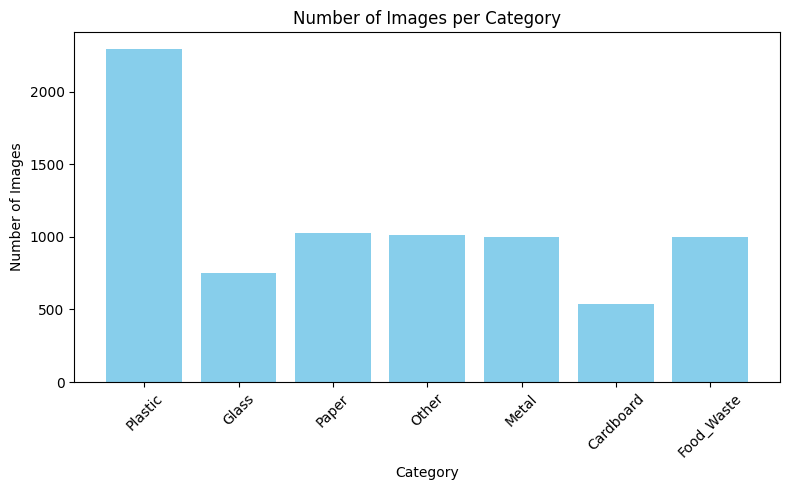

In [14]:
# Visualise Data Distribution

categories = list(category_counts.keys())
counts = list(category_counts.values())


plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color='skyblue')
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

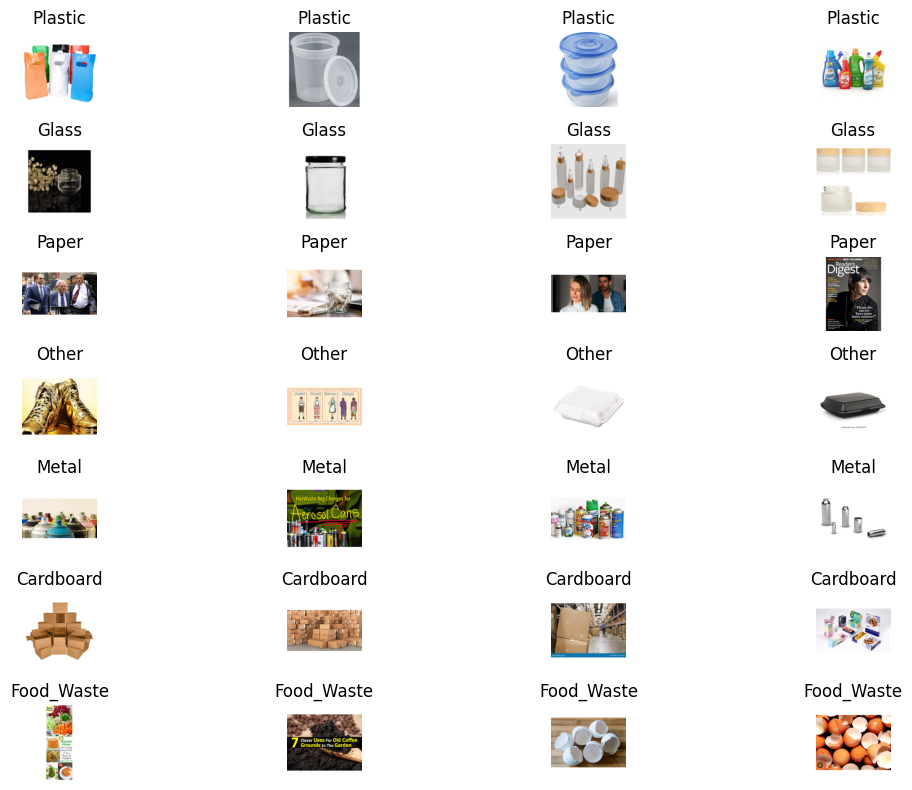

In [15]:
# Visualise Sample Images (across different labels)

folder = data_path
categories = list(category_counts.keys())
counts = list(category_counts.values())

sample_images = []
sample_labels = []

samples_per_category = 4

for category in categories:
    category_folder = os.path.join(folder, category)

    if os.path.isdir(category_folder):
        image_files = [f for f in os.listdir(category_folder) if f.endswith(('.jpg', '.png'))]
        selected_images = random.sample(image_files, samples_per_category)

        for image_file in selected_images:
            img_path = os.path.join(category_folder, image_file)
            img = Image.open(img_path)
            sample_images.append(img)
            sample_labels.append(category)


plt.figure(figsize=(12, 8))

for i, (img, label) in enumerate(zip(sample_images, sample_labels)):
    plt.subplot(len(category_counts), samples_per_category, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)


plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [16]:
# Find the smallest and largest image dimensions from the data set
# Find the smallest and largest image dimensions from the data set

folder = data_path

min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0

for subfolder in os.listdir(folder):
    category_folder = os.path.join(folder, subfolder)

    if os.path.isdir(category_folder):
        for filename in os.listdir(category_folder):
            if filename.lower().endswith(('.jpg', '.png')):
                img_path = os.path.join(category_folder, filename)

                try:
                    with Image.open(img_path) as img:
                        width, height = img.size

                        if width < min_width:
                            min_width = width
                        if height < min_height:
                            min_height = height

                        if width > max_width:
                            max_width = width
                        if height > max_height:
                            max_height = height
                except:
                    print(f"Couldn't open image: {img_path}")

print(f"Smallest Image Dimensions: {min_width} x {min_height}")
print(f"Largest Image Dimensions: {max_width} x {max_height}")

Smallest Image Dimensions: 256 x 256
Largest Image Dimensions: 256 x 256


In [17]:
# Resize the image dimensions

def resize_images(data_path, output_path, target_size=(128, 128)):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for category_folder in os.listdir(data_path):
        category_path = os.path.join(data_path, category_folder)
        output_category_path = os.path.join(output_path, category_folder)

        if os.path.isdir(category_path):
            if not os.path.exists(output_category_path):
                os.makedirs(output_category_path)

            for filename in os.listdir(category_path):
                if filename.endswith('.jpg') or filename.endswith('.png'):
                    img_path = os.path.join(category_path, filename)
                    output_img_path = os.path.join(output_category_path, filename)

                    with Image.open(img_path) as img:
                        img_resized = img.resize(target_size)
                        img_resized.save(output_img_path)

    print(f"Images resized and saved to {output_path}")

In [18]:
output_path = os.path.join(extract_path, 'resized_data')
resize_images(data_path, output_path, target_size=(128, 128))

Images resized and saved to /content/sample_data/CNN_Assignment_1/resized_data


In [19]:
images, labels = load_images_from_folder(output_path)
print(images.shape)
print(labels)

(7625, 128, 128, 3)
['Plastic' 'Plastic' 'Plastic' ... 'Food_Waste' 'Food_Waste' 'Food_Waste']


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [20]:
# Encode the labels suitably
from tensorflow.keras.utils import to_categorical

unique_labels, encoded_labels = np.unique(labels, return_inverse=True)

one_hot_labels = to_categorical(encoded_labels)

print("Unique Labels:", unique_labels)
print("Encoded Labels:", encoded_labels)
print("One-Hot Encoded Labels:\n", one_hot_labels)

Unique Labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Encoded Labels: [6 6 6 ... 1 1 1]
One-Hot Encoded Labels:
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [21]:
# Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images, one_hot_labels, test_size=0.3, stratify=labels, random_state=42)


print(f"Training set shape: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Validation set shape: X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")

Training set shape: X_train shape = (5337, 128, 128, 3), y_train shape = (5337, 7)
Validation set shape: X_val shape = (2288, 128, 128, 3), y_val shape = (2288, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [22]:
# Build and compile the model

input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

print(input_shape)
print(num_classes)

(128, 128, 3)
7


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [23]:
# Training
# Build and compile the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall

def build_model(input_shape, num_classes):
    model = Sequential()

    # Layer 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    # Layer 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    # Layer 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Flatten the output
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy', Precision(), Recall()]
    )

    return model

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [24]:
# Evaluate on the test set; display suitable metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

In [25]:
#Training

X_train=X_train / 255.0
X_val=X_val / 255.0

model_no_aug = build_model(input_shape=X_train.shape[1:], num_classes=y_train.shape[1])

history_no_aug = model_no_aug.fit(
    X_train, y_train,
    validation_data=(X_val , y_val),
    epochs=25,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2606 - loss: 2.5681 - precision: 0.2979 - recall: 0.1704
Epoch 1: val_loss improved from inf to 2.46228, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 27s 90ms/step - accuracy: 0.2609 - loss: 2.5665 - precision: 0.2983 - recall: 0.1706 - val_accuracy: 0.2478 - val_loss: 2.4623 - val_precision: 0.3082 - val_recall: 0.1464 - learning_rate: 0.0010
Epoch 2/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3939 - loss: 1.7925 - precision: 0.5052 - recall: 0.2682
Epoch 2: val_loss improved from 2.46228 to 1.73308, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.3940 - loss: 1.7922 - precision: 0.5052 - recall: 0.2683 - val_accuracy: 0.3623 - val_loss: 1.7331 - val_precision: 0.5041 - val_recall: 0.1613 - learning_rate: 0.0010
Epoch 3/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4416 - loss: 1.5699 - precision: 0.5456 - recall: 0.2893
Epoch 3: val_loss did not improve from 1.73308
167/167 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.4417 - loss: 1.5696 - precision: 0.5457 - recall: 0.2894 - val_accuracy: 0.3663 - val_loss: 1.8806 - val_precision: 0.5450 - val_recall: 0.2010 - learning_rate: 0.0010
Epoch 4/25
165/167 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5167 - loss: 1.3455 - precision: 0.6438 - recall: 0.3661
Epoch 4: val_loss improved from 1.73308 to 1.54808, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5165 - loss: 1.3459 - precision: 0.6436 - recall: 0.3660 - val_accuracy: 0.4397 - val_loss: 1.5481 - val_precision: 0.6226 - val_recall: 0.2863 - learning_rate: 0.0010
Epoch 5/25
165/167 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5470 - loss: 1.2533 - precision: 0.6793 - recall: 0.4093
Epoch 5: val_loss did not improve from 1.54808
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5473 - loss: 1.2529 - precision: 0.6794 - recall: 0.4094 - val_accuracy: 0.4279 - val_loss: 1.8494 - val_precision: 0.5076 - val_recall: 0.3370 - learning_rate: 0.0010
Epoch 6/25
165/167 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6136 - loss: 1.0837 - precision: 0.7412 - recall: 0.4743
Epoch 6: val_loss did not improve from 1.54808
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6137 - loss: 1.0836 - precision: 0.7412 - recall: 0.4745 - val_accuracy: 0.4082 - val_loss: 1.9461 - val_precision: 0.5248 - val_recall: 0.2780 - learning

167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7693 - loss: 0.6843 - precision: 0.8461 - recall: 0.6739 - val_accuracy: 0.5726 - val_loss: 1.2597 - val_precision: 0.6494 - val_recall: 0.4987 - learning_rate: 5.0000e-04
Epoch 9/25
166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8334 - loss: 0.5042 - precision: 0.8868 - recall: 0.7695
Epoch 9: val_loss improved from 1.25969 to 1.14736, saving model to best_model.h5


167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8334 - loss: 0.5043 - precision: 0.8868 - recall: 0.7695 - val_accuracy: 0.6198 - val_loss: 1.1474 - val_precision: 0.6822 - val_recall: 0.5450 - learning_rate: 5.0000e-04
Epoch 10/25
166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8783 - loss: 0.3928 - precision: 0.9111 - recall: 0.8283
Epoch 10: val_loss did not improve from 1.14736
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8781 - loss: 0.3931 - precision: 0.9109 - recall: 0.8282 - val_accuracy: 0.5813 - val_loss: 1.2755 - val_precision: 0.6710 - val_recall: 0.5188 - learning_rate: 5.0000e-04
Epoch 11/25
166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8912 - loss: 0.3375 - precision: 0.9182 - recall: 0.8582
Epoch 11: val_loss did not improve from 1.14736
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8912 - loss: 0.3375 - precision: 0.9182 - recall: 0.8583 - val_accuracy: 0.6333 - val_loss: 1.2622 - val_precision: 0.6875 - val_recall: 0.596

167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9368 - loss: 0.1967 - precision: 0.9553 - recall: 0.9144 - val_accuracy: 0.6753 - val_loss: 1.0934 - val_precision: 0.7294 - val_recall: 0.6420 - learning_rate: 2.5000e-04
Epoch 14/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9589 - loss: 0.1437 - precision: 0.9683 - recall: 0.9462
Epoch 14: val_loss did not improve from 1.09342
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9589 - loss: 0.1437 - precision: 0.9683 - recall: 0.9462 - val_accuracy: 0.6700 - val_loss: 1.1038 - val_precision: 0.7363 - val_recall: 0.6346 - learning_rate: 2.5000e-04
Epoch 15/25
166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9643 - loss: 0.1203 - precision: 0.9746 - recall: 0.9565
Epoch 15: val_loss did not improve from 1.09342
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9643 - loss: 0.1203 - precision: 0.9746 - recall: 0.9566 - val_accuracy: 0.6726 - val_loss: 1.1275 - val_precision: 0.7271 - val_recall: 0.64

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step
Classification Report for Validation Set:
              precision    recall  f1-score   support

   Cardboard       0.82      0.70      0.76       162
  Food_Waste       0.79      0.66      0.72       300
       Glass       0.61      0.75      0.67       225
       Metal       0.71      0.61      0.66       300
       Other       0.59      0.55      0.57       303
       Paper       0.60      0.55      0.57       309
     Plastic       0.68      0.79      0.73       689

    accuracy                           0.68      2288
   macro avg       0.69      0.66      0.67      2288
weighted avg       0.68      0.68      0.67      2288



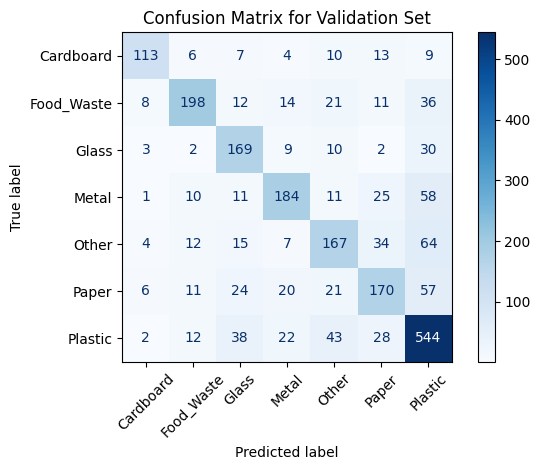

In [26]:
# Evaluate on the test set; display suitable metrics

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the validation set
y_pred = model_no_aug.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification Report for validation set
print("Classification Report for Validation Set:")
print(classification_report(y_true_classes, y_pred_classes, target_names=unique_labels))

# Confusion Matrix for validation set
cm = confusion_matrix(y_true_classes, y_pred_classes, labels=np.arange(num_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix for Validation Set")
plt.tight_layout()
plt.show()

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

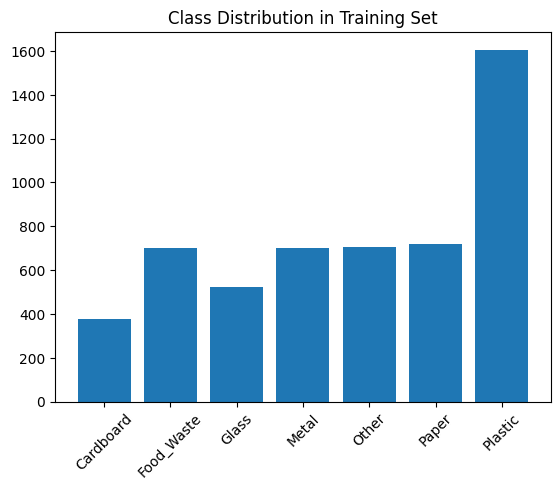

In [27]:
# Define augmentation steps to augment images

import numpy as np
import matplotlib.pyplot as plt

class_counts = np.sum(y_train, axis=0)
plt.bar(range(len(class_counts)), class_counts)
plt.xticks(range(len(class_counts)), unique_labels, rotation=45)
plt.title("Class Distribution in Training Set")
plt.show()

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [28]:
# Create a function to augment the images


from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=7,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [29]:
# Create the augmented training dataset

from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)

class_weights = dict(enumerate(class_weights))

In [30]:
model_aug = build_model(input_shape=X_train.shape[1:], num_classes=y_train.shape[1])

history_aug = model_aug.fit(
    datagen.flow(X_train, y_train, batch_size=32,seed=42),
    validation_data=(X_val, y_val),
    epochs=45,
    callbacks=callbacks,
    verbose=1,
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.2344 - loss: 2.5597 - precision_1: 0.2628 - recall_1: 0.1590
Epoch 1: val_loss did not improve from 1.09342
167/167 ━━━━━━━━━━━━━━━━━━━━ 48s 239ms/step - accuracy: 0.2346 - loss: 2.5582 - precision_1: 0.2631 - recall_1: 0.1591 - val_accuracy: 0.1324 - val_loss: 2.9962 - val_precision_1: 0.1345 - val_recall_1: 0.1294 - learning_rate: 0.0010
Epoch 2/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.3267 - loss: 1.9341 - precision_1: 0.3814 - recall_1: 0.1946
Epoch 2: val_loss did not improve from 1.09342
167/167 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.3267 - loss: 1.9339 - precision_1: 0.3814 - recall_1: 0.1945 - val_accuracy: 0.1731 - val_loss: 2.3010 - val_precision_1: 0.2472 - val_recall_1: 0.0782 - learning_rate: 0.0010
Epoch 3/45
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.3514 - loss: 1.7657 - precision_1: 0.4414 - recall_1: 0.2046
Epoch 3: val_loss did not improve from 1.09342
167/

##### **4.1.2**

Train the model on the new augmented dataset.

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


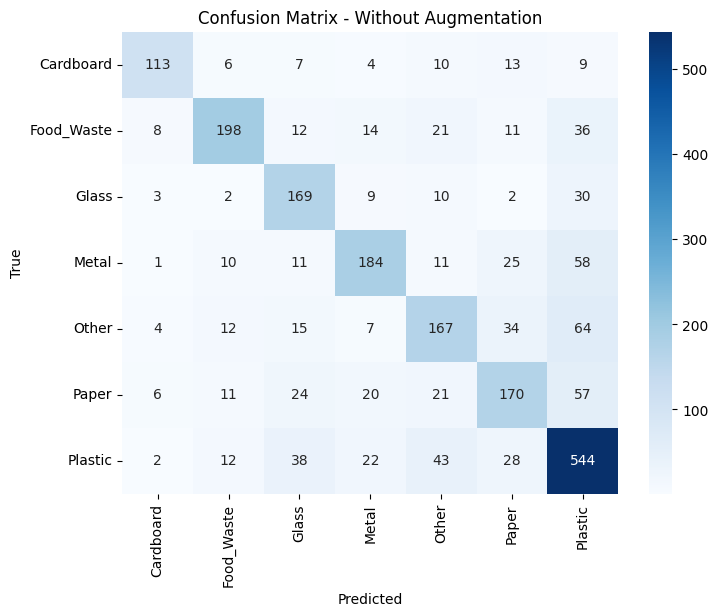

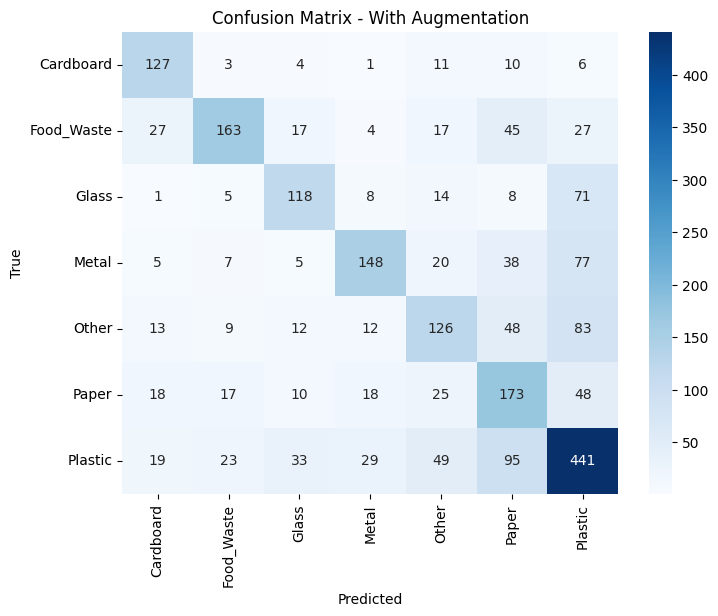

In [32]:
# Train the model using augmented images

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model_no_aug.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

y_pred1 = model_aug.predict(X_val)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_true_classes1 = np.argmax(y_val, axis=1)

# Compute confusion matrices
cm1 = confusion_matrix(y_true_classes, y_pred_classes)
cm2 = confusion_matrix(y_true_classes1, y_pred_classes1)

def plot_conf_matrix(cm, title, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_conf_matrix(cm1, 'Confusion Matrix - Without Augmentation', unique_labels)
plot_conf_matrix(cm2, 'Confusion Matrix - With Augmentation', unique_labels)

In [33]:
print("Classification Report for Validation Set before augmentation:")
print(classification_report(y_true_classes, y_pred_classes, target_names=unique_labels))

print("Classification Report for Validation Set after augmentation:")
print(classification_report(y_true_classes1, y_pred_classes1, target_names=unique_labels))

Classification Report for Validation Set before augmentation:
              precision    recall  f1-score   support

   Cardboard       0.82      0.70      0.76       162
  Food_Waste       0.79      0.66      0.72       300
       Glass       0.61      0.75      0.67       225
       Metal       0.71      0.61      0.66       300
       Other       0.59      0.55      0.57       303
       Paper       0.60      0.55      0.57       309
     Plastic       0.68      0.79      0.73       689

    accuracy                           0.68      2288
   macro avg       0.69      0.66      0.67      2288
weighted avg       0.68      0.68      0.67      2288

Classification Report for Validation Set after augmentation:
              precision    recall  f1-score   support

   Cardboard       0.60      0.78      0.68       162
  Food_Waste       0.72      0.54      0.62       300
       Glass       0.59      0.52      0.56       225
       Metal       0.67      0.49      0.57       300
       Ot

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

---

## 🧾 Dataset Composition

* The dataset consists of images from **7 waste categories**: *Cardboard, Food\_Waste, Glass, Metal, Paper, Plastic,* and *Other*.
* Images are stored in folders corresponding to their labels.
* Format: `.png` images resized to a standard **128×128×3** resolution for uniform input shape.

### 🧮 Class Distribution

* The dataset is **imbalanced**:

  * **Plastic** class has the most images (\~2295)
  * **Cardboard** has the fewest (\~540)
* Class imbalance can affect the model’s ability to learn underrepresented categories.

### 🧪 Label Encoding

* Labels were extracted from folder names.
* **One-hot encoding** was applied to prepare the categorical labels for training a multi-class classification model.

---

## 🧪 Data Splitting

* The dataset was split **70:30** into training and validation sets.
* **Stratification** was applied to preserve class distributions in both sets.

### ⚠️ Potential Issues:

* Class imbalance may lead to biased learning.
* Some classes have visually similar features (e.g., plastic vs. food waste), increasing classification difficulty.

---

## 🧠 Model Architecture

### 🔹 Type of Model:

* **Custom Convolutional Neural Network (CNN)** built using `Keras Sequential`.

### 🔹 Convolutional Layers:

* Used **3 convolutional layers** with increasing filter sizes.
* Each layer followed this pattern:

  ```plaintext
  Conv2D → BatchNormalization → MaxPooling2D → Dropout
  ```

### 🔹 Kernel Size and Stride:

* **Kernel size**: (3×3) in all layers — balances detail capture and computational cost.
* **Stride**: default (1,1) — maintains spatial resolution before pooling.
* Kernel size and stride were **kept consistent** across layers for simplicity and stability.

### 🔹 Number of Filters:

* Filters increased progressively: `32 → 64 → 128`
* This helps the model capture low- to high-level features.
* The number of filters was chosen based on:

  * Standard CNN design pattern
  * Input image size (128×128)
  * Memory constraints

### 🔹 Why Batch Normalization and Pooling:

* **Batch Normalization**:

  * Stabilizes training by normalizing activations
  * Speeds up convergence
  * Provides regularization
* **MaxPooling**:

  * Downsamples feature maps
  * Reduces computation
  * Makes model invariant to small shifts and noise

### 🔹 Fully Connected Layers:

* After flattening the output of the final conv block:

  * `Dense(512)` → `BatchNorm` → `Dropout(0.5)`
  * `Dense(256)` → `Dropout(0.5)`
* This adds non-linearity and learnable weights for final classification.

### 🔹 Output Layer:

* `Dense(7, activation='softmax')` for 7-class classification.
* Outputs a **probability distribution** over the classes.

### 🔹 Activation Functions:

* **ReLU** in all hidden (conv and dense) layers — standard for non-linearity.
* **Softmax** in the output — for multi-class probability predictions.

### ✅ Did we try different activations?

* No alternate activations (e.g., Leaky ReLU, ELU) were tested. Future work could compare these for performance improvements.

---

## ⚙️ Training Configuration

### 🔹 Loss Function:

* Used **Categorical Crossentropy** — suitable for one-hot encoded, multi-class classification.

### 🔹 Optimizer:

* **Adam** optimizer — adaptive learning rate, good for general-purpose CNNs.

### 🔹 Callbacks Used:

* **EarlyStopping** (patience=5) — prevent overfitting
* **ModelCheckpoint** — save best model (based on val\_loss)
* **ReduceLROnPlateau** — adjust learning rate when validation loss stagnates

### 🔹 Loss/Accuracy Over Epochs:

* Training loss steadily decreased; accuracy reached \~95%.
* Validation loss plateaued or increased slightly; accuracy capped at \~68%.
* Indicates overfitting.

---

## 📈 Model Evaluation

### 🔹 Performance Metrics:

* **Accuracy**: \~65% on validation set and 95% on training set
* **Precision / Recall / F1-Score**: All around \~67–68%
* **Confusion Matrix**:

  * Better performance on *Plastic* and *Food\_Waste* (major classes)
  * Poorer on *Cardboard* (least represented)

---

## 🔄 Data Augmentation (Affine & Linear Transformations)

### 🔹 Why Augment:

* To address class imbalance
* Improve generalization
* Reduce overfitting

### 🔹 Augmentation Techniques Used:

```python
ImageDataGenerator(
    rotation_range=7
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
```

* These include **affine transformations** like:

  * Rotation
  * Translation
  * Shear
  * Scaling (zoom)
  * Flip (symmetry)

### 🔹 Did We Train with Augmented Data?

* Yes, training was done using `datagen.flow(X_train, y_train, batch_size=32)`.
* Validation was done on original (unaugmented) data.

### 🔹 How Many Augmented Images?

* Augmentation was **done on-the-fly** per epoch, so total number depends on:

  * `batch_size`, `epochs`, and training set size.
* This does **not increase dataset size on disk**, but feeds unique variations per epoch.

### 🔹 Did It Help?

* Yes — validation accuracy improved **from \~65% to \~70%** and training accuracy moved from 94% to 84%
* Gap between train and val accuracy narrowed — overfitting reduced.
* Additional improvements possible with:

  * More aggressive augmentation
  * Class weighting
  * Better architectures (e.g., ResNet, MobileNet)

---

## 🏁 Final Model Summary

### ✅ Best Model So Far:

* **3-layer CNN** with BatchNorm, Dropout, ReLU, and Data Augmentation.
* Performed at \~70% validation accuracy.
* Overfitting was reduced but still present.

---

